**Install and import neccessary libraries.**

In [ ]:
!pip install catboost
!pip install ISLP
!pip install seaborn
!pip install bnlearn
!pip install mlxtend
!pip install boruta
!pip install shap

import shap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from boruta import BorutaPy
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score
from ISLP import confusion_table
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from google.colab import drive

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached bnlearn-0.10.2-py3-none-any.whl.metadata (13 kB)
  Using cached pgmpy-0.1.26-py3-none-any.whl.metadata (9.1 kB)
  Using cached ismember-1.0.5-py3-none-any.whl.metadata (3.4 kB)
  Using cached funcsigs-1.0.2-py2.py3-none-any.whl.metadata (14 kB)
  Using cached df2onehot-1.0.7-py3-none-any.whl.metadata (3.3 kB)
  Using cached pypickle-1.1.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached datazets-0.2.0-py3-none-any.whl.metadata (9.2 kB)
  Using cached setgraphviz-1.0.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached lingam-1.9.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached psy-0.0.1-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached semopy-2.3.11.tar.gz (1.6 MB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

**Load the training and test data, split training data into features and outcome.**

In [ ]:
drive.mount('/content/drive')
# Load training and test data, without the unnecessary doctor details
training_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
training_data = training_data.drop(columns='DoctorInCharge')
test_data = test_data.drop(columns='DoctorInCharge')

# Split dataset into variables and outcome.
X_train = training_data.drop(columns='Diagnosis')
Y_train = training_data['Diagnosis']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


**Implement Boruta Algorithm for Variable Selection**

In [ ]:
# Boruta Algorithm for feature selection
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=88)
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, max_iter=100, random_state=88)
# Fit Boruta
boruta.fit(X_train.values, Y_train.values)
# Extract important features
selected_features = X_train.columns[boruta.support_]
print("Selected Features:", list(selected_features))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	27
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	27
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	27
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	27
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	27
I

**We load selected features only into a new training set, which will be the training set for our models.**

In [ ]:
# Boruta Algorithm selected set of features only
X_train2 = X_train[selected_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**We fit the Logistic Regression model, and perform 20-fold cross validation to get the necessary metrics.**

In [ ]:
# Logistic Regression

#20-Fold CV error
kf = KFold(n_splits=20, shuffle=True, random_state=88)
model = LogisticRegression(max_iter=100000)
accuracies = []
tpr_list = []
tnr_list = []
f1_list = []
precision_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_train2):
    # Split the data
    x_train, x_test = X_train2.iloc[train_index], X_train2.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute TPR and FPR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (fp + tn)  # False Positive Rate
    tpr_list.append(tpr)
    tnr_list.append(tnr)

    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_list.append(precision)
    f1_list.append(f1)

    # Compute accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Cross-validation error

# Average cross-validation error
cv_accuracy = np.mean(accuracies)

# Compute average metrics across all folds
metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "True Negative Rate (TNR))", "Precision", "CV accuracy", "F1 Score"],
    "Average Value": [
        np.mean(tpr_list),
        np.mean(tnr_list),
        np.mean(precision_list),
        np.mean(accuracies),
        np.mean(f1_list),
    ]
})



print(f"20-Fold Cross-Validation Error: {cv_accuracy}")
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20-Fold Cross-Validation Error: 0.8430526315789473
                      Metric  Average Value
0   True Positive Rate (TPR)       0.738081
1  True Negative Rate (TNR))       0.900571
2                  Precision       0.807726
3                CV accuracy       0.843053
4                   F1 Score       0.765377


**We find the optimal hyperparameters of the SVM model using a grid search.**

In [ ]:
# Grid Search for hyperparameters of SVM
SVM_beta = SVC()
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [5, 10, 20],
    'gamma': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=SVM_beta,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train2, Y_train)

# Print best parameters and best score
print("Best Parameters for SVM:", grid_search.best_params_)
print("Best CV Accuracy for SVM:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**We perform 20-fold cross validation on our Support Vector Machine model to get the necessary metrics.**


In [ ]:
# Support Vector Machine

#20-Fold CV error
kf = KFold(n_splits=20, shuffle=True, random_state=88)
model = SVC(kernel='rbf', C=20, probability=True, gamma=0.01)
accuracies = []
tpr_list = []
tnr_list = []
f1_list = []
precision_list = []
# Perform cross-validation
for train_index, test_index in kf.split(X_train2):
    # Split the data
    x_train, x_test = X_train2.iloc[train_index], X_train2.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute TPR and FPR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (fp + tn)  # False Positive Rate
    tpr_list.append(tpr)
    tnr_list.append(tnr)

    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_list.append(precision)
    f1_list.append(f1)

    # Compute accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Cross-validation error

# Average cross-validation error
cv_accuracy = np.mean(accuracies)

# Compute average metrics across all folds
metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "True Negative Rate (TNR))", "Precision", "CV accuracy", "F1 Score"],
    "Average Value": [
        np.mean(tpr_list),
        np.mean(tnr_list),
        np.mean(precision_list),
        np.mean(accuracies),
        np.mean(f1_list),
    ]
})



print(f"20-Fold Cross-Validation Error: {cv_accuracy}")
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20-Fold Cross-Validation Error: 0.9181929824561404
                      Metric  Average Value
0   True Positive Rate (TPR)       0.871683
1  True Negative Rate (TNR))       0.944315
2                  Precision       0.894864
3                CV accuracy       0.918193
4                   F1 Score       0.880908


**We fit the Decision Tree model, and perform 20-fold cross validation to get the necessary metrics.**



In [ ]:
# Decision tree

#20-Fold CV error
kf = KFold(n_splits=20, shuffle=True, random_state=88)
model = DecisionTreeClassifier(random_state=88)
accuracies = []
tpr_list = []
tnr_list = []
f1_list = []
precision_list = []
# Perform cross-validation
for train_index, test_index in kf.split(X_train2):
    # Split the data
    x_train, x_test = X_train2.iloc[train_index], X_train2.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute TPR and FPR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (fp + tn)  # False Positive Rate
    tpr_list.append(tpr)
    tnr_list.append(tnr)

    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_list.append(precision)
    f1_list.append(f1)

    # Compute accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Cross-validation error

# Average cross-validation error
cv_accuracy = np.mean(accuracies)

# Compute average metrics across all folds
metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "True Negative Rate (TNR))", "Precision", "CV accuracy", "F1 Score"],
    "Average Value": [
        np.mean(tpr_list),
        np.mean(tnr_list),
        np.mean(precision_list),
        np.mean(accuracies),
        np.mean(f1_list),
    ]
})



print(f"20-Fold Cross-Validation Error: {cv_accuracy}")
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20-Fold Cross-Validation Error: 0.9175701754385965
                      Metric  Average Value
0   True Positive Rate (TPR)       0.880152
1  True Negative Rate (TNR))       0.937734
2                  Precision       0.883741
3                CV accuracy       0.917570
4                   F1 Score       0.880713


**We perform a grid search to find the optimal hyperparamters for XgBoost model.**

In [ ]:
# Grid Search for hyperparameters of XgBoost
XG_beta = XGBClassifier(eval_metric = 'logloss', verbose=0, use_label_encoder=False, random_state=88)
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=XG_beta,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=0,
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search
grid_search.fit(X_train2, Y_train)

# Print best parameters and best score
print("Best Parameters for XGB:", grid_search.best_params_)
print("Best CV Accuracy for XGB:", grid_search.best_score_)


**We fit the XgBoost model, perform 20-fold cross validation to get the necessary metrics.**

In [ ]:
# XgBoost

#20-Fold CV error
kf = KFold(n_splits=20, shuffle=True, random_state=88)
model = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.05,
    max_depth = 4,
    subsample = 0.7,
    colsample_bytree = 0.8,
    eval_metric='logloss',
    random_state=88)
accuracies = []
tpr_list = []
tnr_list = []
f1_list = []
precision_list = []
# Perform cross-validation
for train_index, test_index in kf.split(X_train2):
    # Split the data
    x_train, x_test = X_train2.iloc[train_index], X_train2.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute TPR and FPR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (fp + tn)  # False Positive Rate
    tpr_list.append(tpr)
    tnr_list.append(tnr)

    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_list.append(precision)
    f1_list.append(f1)

    # Compute accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Cross-validation error

# Average cross-validation error
cv_accuracy = np.mean(accuracies)

# Compute average metrics across all folds
metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "True Negative Rate (TNR))", "Precision", "CV accuracy", "F1 Score"],
    "Average Value": [
        np.mean(tpr_list),
        np.mean(tnr_list),
        np.mean(precision_list),
        np.mean(accuracies),
        np.mean(f1_list),
    ]
})



print(f"20-Fold Cross-Validation Error: {cv_accuracy}")
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20-Fold Cross-Validation Error: 0.9587719298245613
                      Metric  Average Value
0   True Positive Rate (TPR)       0.928122
1  True Negative Rate (TNR))       0.976005
2                  Precision       0.952824
3                CV accuracy       0.958772
4                   F1 Score       0.938735


**We find the optimal hyperparameters of the CatBoost model using a grid search.**

In [ ]:
# Grid Search for hyperparameters of CatBoost
CB_beta = CatBoostClassifier(verbose=0, random_state=88)
param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
}

grid_search = GridSearchCV(estimator=CB_beta,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=0,
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search
grid_search.fit(X_train2, Y_train)

# Print best parameters and best score
print("Best Parameters for CB:", grid_search.best_params_)
print("Best CV Accuracy for CB:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters for CB: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Best CV Accuracy for CB: 0.9594437086092716


**Fit the CatBoost model, perform 20-fold cross validation to get the necessary metrics.**

In [ ]:
# CatBoost

#20-Fold CV error
kf = KFold(n_splits=20, shuffle=True, random_state=88)
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=88)
accuracies = []
tpr_list = []
tnr_list = []
f1_list = []
precision_list = []
# Perform cross-validation
for train_index, test_index in kf.split(X_train2):
    # Split the data
    x_train, x_test = X_train2.iloc[train_index], X_train2.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute TPR and FPR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (fp + tn)  # False Positive Rate
    tpr_list.append(tpr)
    tnr_list.append(tnr)

    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_list.append(precision)
    f1_list.append(f1)

    # Compute accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Cross-validation error

# Average cross-validation error
cv_accuracy = np.mean(accuracies)

# Compute average metrics across all folds
metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "True Negative Rate (TNR))", "Precision", "CV accuracy", "F1 Score"],
    "Average Value": [
        np.mean(tpr_list),
        np.mean(tnr_list),
        np.mean(precision_list),
        np.mean(accuracies),
        np.mean(f1_list),
    ]
})



print(f"20-Fold Cross-Validation Error: {cv_accuracy}")
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20-Fold Cross-Validation Error: 0.9601052631578948
                      Metric  Average Value
0   True Positive Rate (TPR)       0.931735
1  True Negative Rate (TNR))       0.976005
2                  Precision       0.952677
3                CV accuracy       0.960105
4                   F1 Score       0.940867


**Find optimal hyperparameters for the Random Forest model using a grid search.**

In [ ]:
# Grid Search for RF
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': [3, 5, 7],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create a Random Forest classifier
RF_beta = RandomForestClassifier(random_state=88)

grid_search = GridSearchCV(estimator=RF_beta,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=0,
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search
grid_search.fit(X_train2, Y_train)

# Print best parameters and best score
print("Best Parameters for RF:", grid_search.best_params_)
print("Best CV Accuracy for RF:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters for RF: {'max_depth': None, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
Best CV Accuracy for RF: 0.9567902869757173


**We use the validation set method to approximate that it still results in good predictive performances, then check gini-importance rankings for our Random Forest model.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prediction accuracy: 0.9521276595744681
Truth        0    1
Predicted          
0          470   13
1           23  246


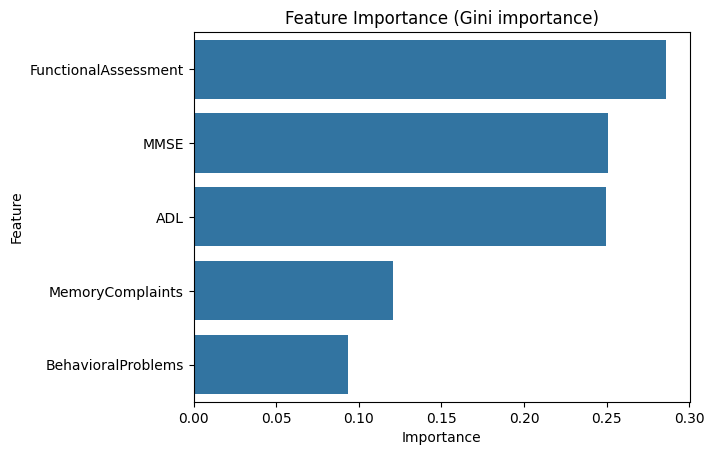

In [ ]:
# Random Forest Cross Validation for feature importance visualization.
x_train, x_test, y_train, y_test = train_test_split(X_train2, Y_train, test_size= 0.5, random_state = 1)
RF_CV = RandomForestClassifier(
    n_estimators=300,
    max_features=3,
    max_depth=None,
    min_samples_split=5,
    random_state=88,
    n_jobs=1
    )
RF_CV.fit(x_train,y_train)
y_pred = RF_CV.predict(x_test)

# Check accuracy to check if fitting onvalidation set still results in good model
print(f"Prediction accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_table(y_test, y_pred))

# Print feature importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': RF_CV.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Gini importance)")
plt.show()

**We fit the Random Forest model and use 20-fold cross validation to retrieve the necessary metrics.**

In [ ]:
# Random Forest

#20-Fold CV error for RF
kf = KFold(n_splits=20, shuffle=True, random_state=88)
model = RandomForestClassifier(
    n_estimators=300,
    max_features=3,
    max_depth=None,
    min_samples_split=5,
    random_state=88,
    n_jobs=1
    )
accuracies = []
tpr_list = []
tnr_list = []
f1_list = []
precision_list = []
# Perform cross-validation
for train_index, test_index in kf.split(X_train2):
    # Split the data
    x_train, x_test = X_train2.iloc[train_index], X_train2.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute TPR and FPR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (fp + tn)  # False Positive Rate
    tpr_list.append(tpr)
    tnr_list.append(tnr)

    # Compute precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_list.append(precision)
    f1_list.append(f1)

    # Compute accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Cross-validation error

# Average cross-validation error
cv_accuracy = np.mean(accuracies)

# Compute average metrics across all folds
metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "True Negative Rate (TNR))", "Precision", "CV accuracy", "F1 Score"],
    "Average Value": [
        np.mean(tpr_list),
        np.mean(tnr_list),
        np.mean(precision_list),
        np.mean(accuracies),
        np.mean(f1_list),
    ]
})



print(f"20-Fold Cross-Validation Error: {cv_accuracy}")
print(metrics_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


20-Fold Cross-Validation Error: 0.9574385964912281
                      Metric  Average Value
0   True Positive Rate (TPR)       0.927561
1  True Negative Rate (TNR))       0.973848
2                  Precision       0.949250
3                CV accuracy       0.957439
4                   F1 Score       0.936891


**In the following block of code, we plot ROC curves of all cross validated model results onto a singular graph to facilitate our decision process.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


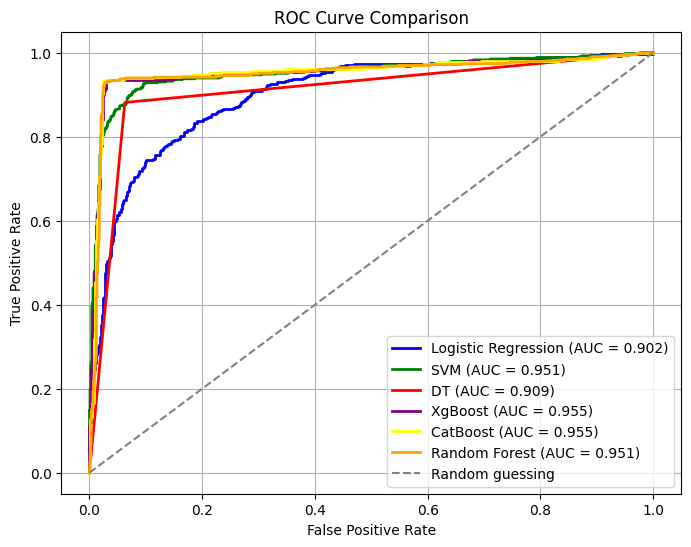

In [ ]:
# Function to compute ROC curve from cross-validation
def compute_cv_roc(model, X, Y, kf):
    true_labels = []
    predicted_probs = []
    for train_index, test_index in kf.split(X):
        # Split data
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Train the model
        model.fit(x_train, y_train)

        # Predict probabilities for the test set
        y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class
        true_labels.extend(y_test)
        predicted_probs.extend(y_prob)

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, thresholds, roc_auc

# logistic regression model
logistic_model = LogisticRegression(max_iter=100000)
# support vector machine model
svm_model = SVC(kernel='rbf', C=20, probability=True, gamma=0.01)
# decision tree model
dt_model = DecisionTreeClassifier(random_state=88)
# XgBoost model
xgb_model = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    eval_metric='logloss',
    random_state=88)
# CatBoost model
cb_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=88)
# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_features=3,
    max_depth=None,
    min_samples_split=5,
    n_jobs=1,
    random_state=88)

# Set up cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=88)

# collect relevant measures
fpr_lr, tpr_lr, thresholds_lr, roc_auc_lr = compute_cv_roc(logistic_model, X_train2, Y_train, kf)
fpr_svm, tpr_svm, thresholds_svm, roc_auc_svm = compute_cv_roc(svm_model, X_train2, Y_train, kf)
fpr_dt, tpr_dt, thresholds_dt, roc_auc_dt = compute_cv_roc(dt_model, X_train2, Y_train, kf)
fpr_xgb, tpr_xgb, thresholds_xgb, roc_auc_xgb = compute_cv_roc(xgb_model, X_train2, Y_train, kf)
fpr_cb, tpr_cb, thresholds_cb, roc_auc_cb = compute_cv_roc(cb_model, X_train2, Y_train, kf)
fpr_rf, tpr_rf, thresholds_rf, roc_auc_rf = compute_cv_roc(rf_model, X_train2, Y_train, kf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.3f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT (AUC = {roc_auc_dt:.3f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XgBoost (AUC = {roc_auc_xgb:.3f})')
plt.plot(fpr_cb, tpr_cb, color='yellow', lw=2, label=f'CatBoost (AUC = {roc_auc_cb:.3f})')
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**We then plot the ROC curve of the random forest separately for more inference.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


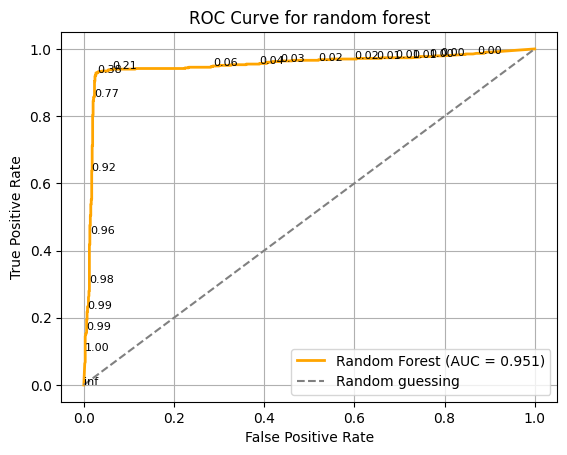

In [ ]:
# Plot ROC curve for random forest
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guessing')

# Annotate thresholds
for i, threshold in enumerate(thresholds_rf):
    if i % 10 == 0:  # Annotate every 10th threshold for clarity
        plt.annotate(f'{threshold:.2f}', (fpr_rf[i], tpr_rf[i]), fontsize=8)

# Plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for random forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**We find the mean SHAP values, and also generate waterfall plots to view SHAP values for specific observations.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean SHAP values per feature, by class:
                       Class 0   Class 1
MMSE                 -0.004113  0.004113
FunctionalAssessment -0.008141  0.008141
MemoryComplaints     -0.004481  0.004481
BehavioralProblems   -0.001809  0.001809
ADL                   0.003570 -0.003570


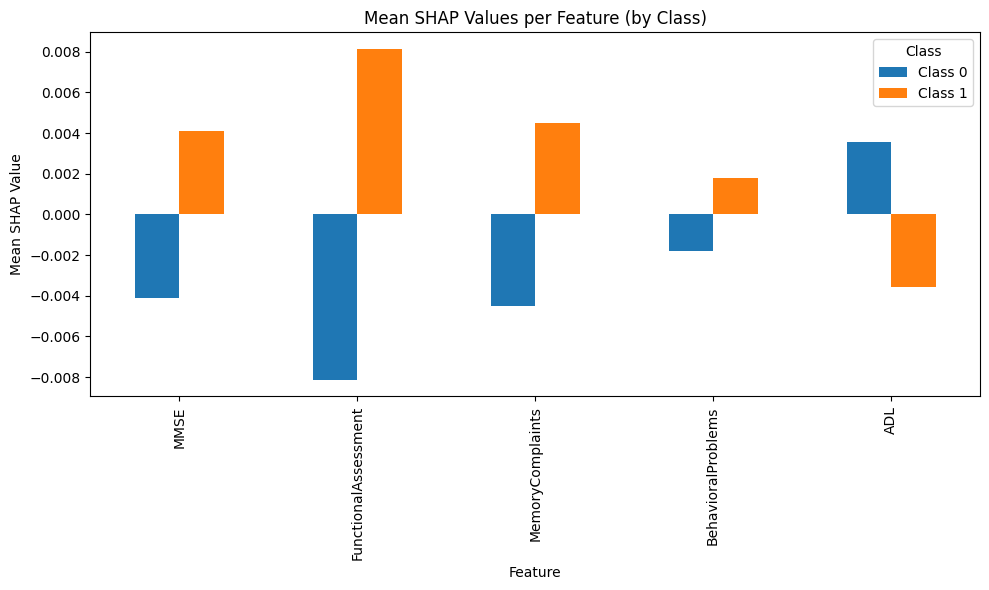

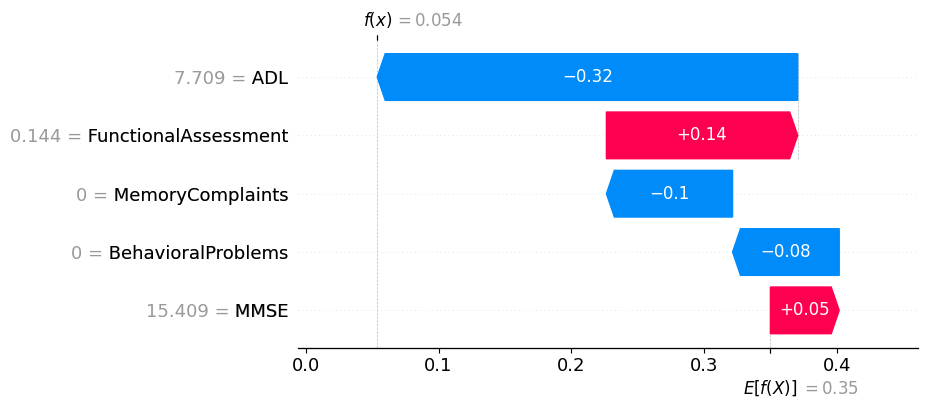

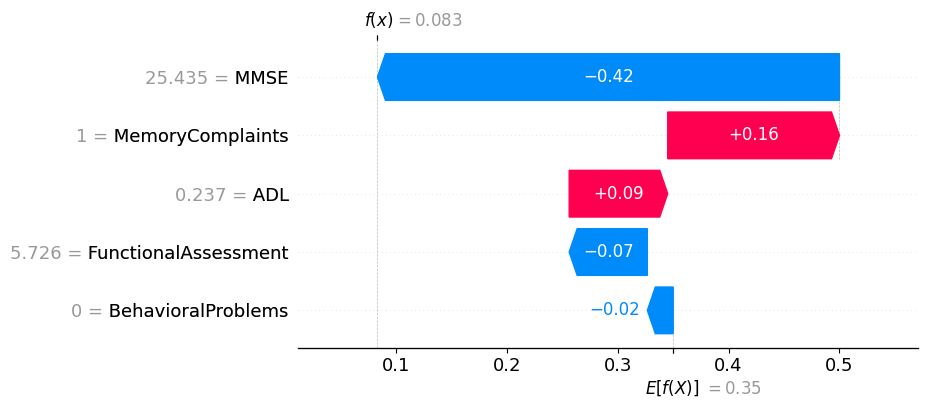

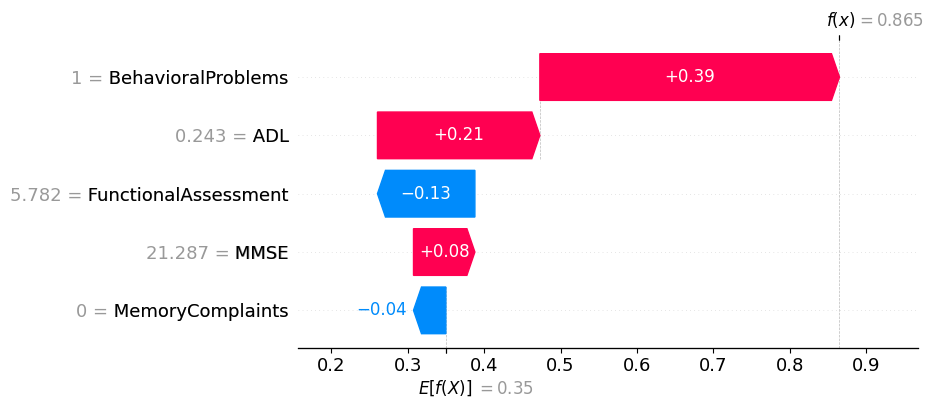

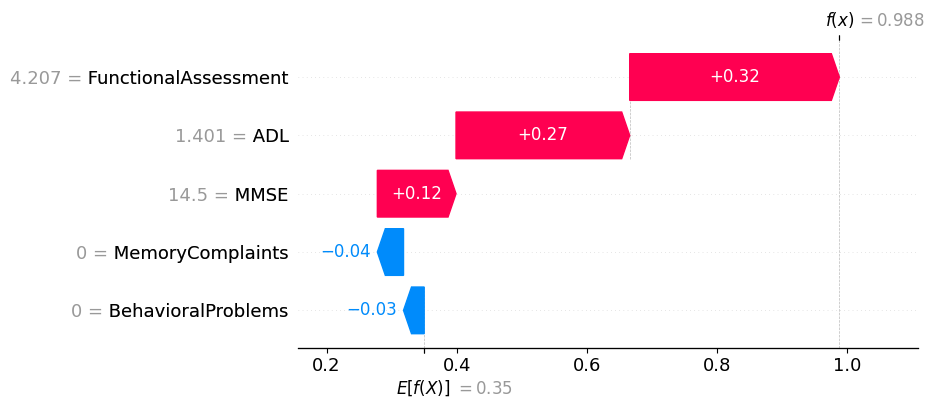

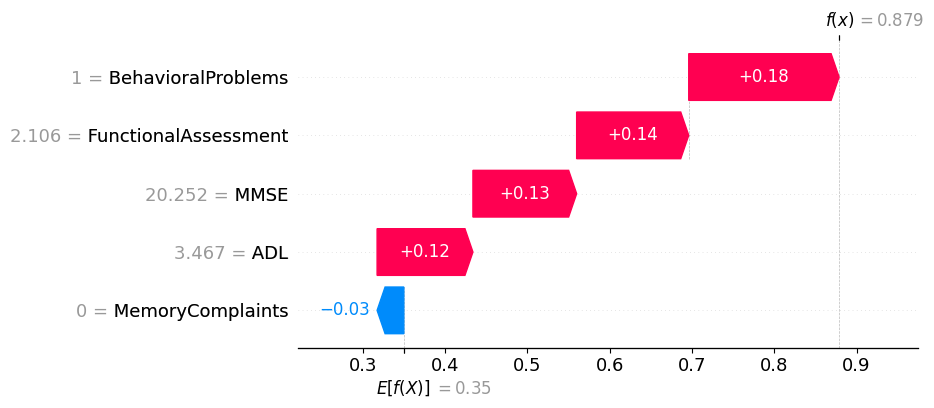

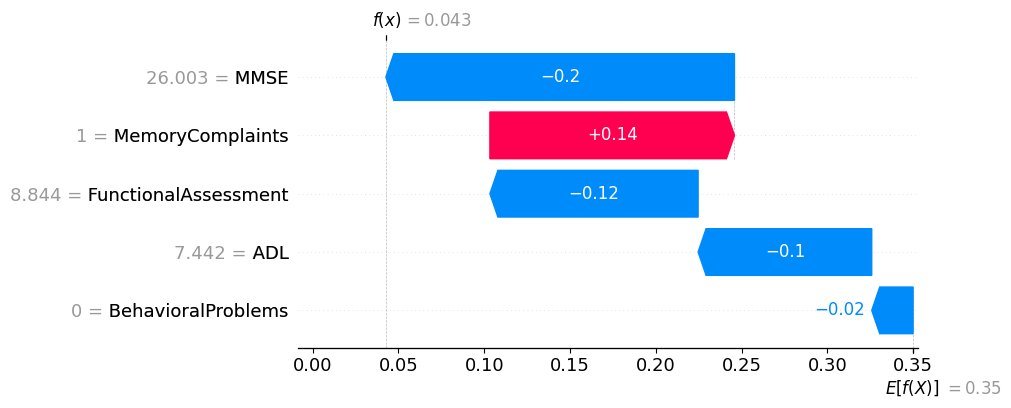

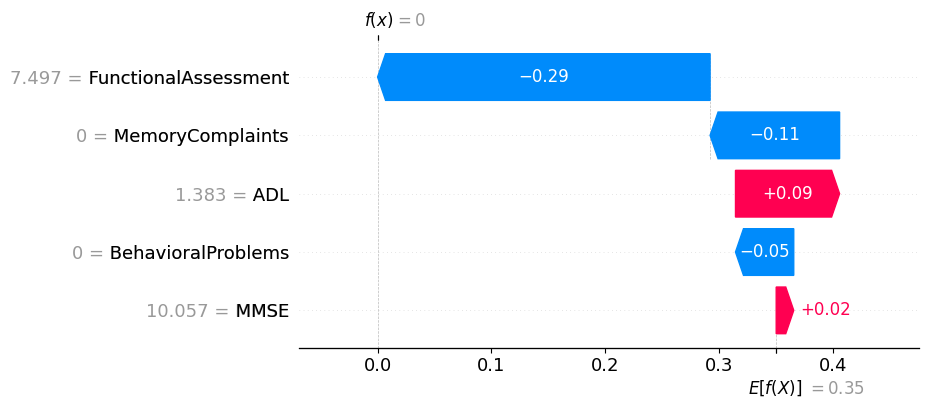

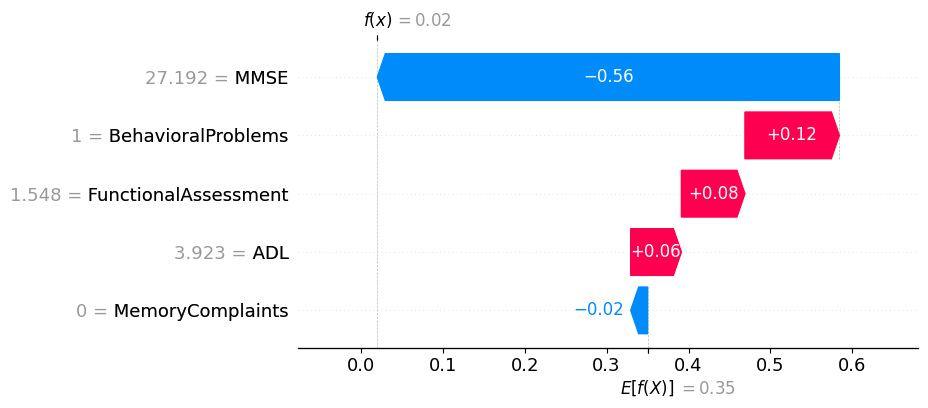

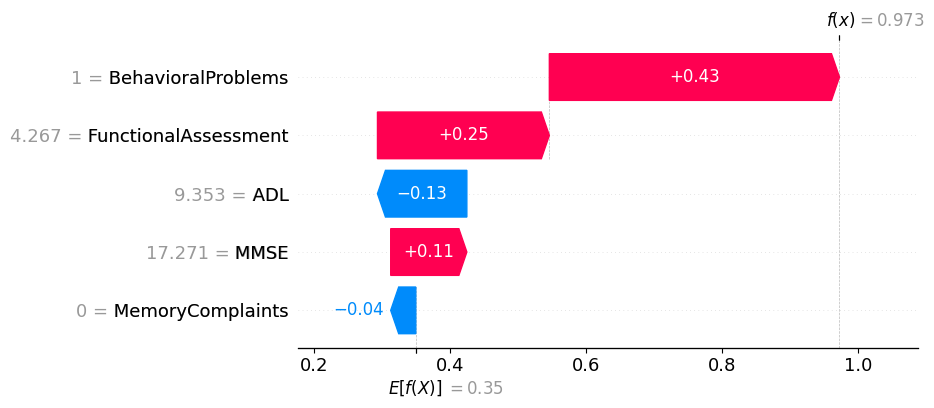

In [ ]:
# SHAP implementation for RF

X_train2 = X_train2.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_train2, Y_train, test_size=0.5, random_state=1)

# Train Random Forest model
RF = RandomForestClassifier(
    n_estimators=300,
    max_features=3,
    max_depth=None,
    min_samples_split=5,
    random_state=88,
    n_jobs=1
)
RF.fit(x_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(RF)

# Compute SHAP values
shap_values = explainer.shap_values(x_test)  # SHAP values for each class

# Initialize storage for aggregated SHAP values
n_features = x_test.shape[1]  # Number of features
n_classes = 2                 # Number of classes (binary classification)
shap_values_array = np.zeros((n_classes, x_test.shape[0], n_features))

# Iterate over samples to collect SHAP values
for i, shap_matrix in enumerate(shap_values):  # shap_values is a list of (5, 2) matrices
    shap_values_array[:, i, :] = shap_matrix.T  # Transpose to align features and classes

# Aggregate SHAP values
shap_mean_per_class = shap_values_array.mean(axis=1)  # Mean SHAP values across all samples
shap_mean_df = pd.DataFrame(
    shap_mean_per_class.T,  # Transpose so features are rows
    columns=[f'Class {i}' for i in range(n_classes)],
    index=x_test.columns  # Feature names
)

# Display SHAP summary per class
print("Mean SHAP values per feature, by class:")
print(shap_mean_df)

# Plot SHAP values for each class
shap_mean_df.plot(kind="bar", figsize=(10, 6))
plt.title("Mean SHAP Values per Feature (by Class)")
plt.ylabel("Mean SHAP Value")
plt.xlabel("Feature")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 1

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)


# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 7

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 23

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 24

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 50

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 77

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 88

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 99

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

# Choose an instance index (e.g., 0 for the first instance in the test set)
instance_index = 11

# SHAP values for a specific class (e.g., Class 1)
shap_values_instance = shap_values[instance_index][:,1]

# Feature values for that specific instance
instance_features = x_test.iloc[instance_index].values

# Generate the waterfall plot for this instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance,              # SHAP values for the instance
                     base_values=explainer.expected_value[1],  # Expected value for Class 1
                     feature_names=x_test.columns,             # Feature names
                     data=instance_features)                   # Feature values for the instance
)

**Divide quantitative variables into 3 bins (lower, middle, upper bound) and implement FP growth algorithm for association rule mining.**

In [ ]:
# FP Growth Algorithm for Association Rule Mining

# Create a copy of our training set
X_train3 = X_train2.copy()

# Use Decision Tree binning for ideal bins
def tree_based_binning(X, y, feature, max_leaf_nodes=3):
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    tree.fit(X[[feature]], y)
    thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold != -2])
    bins = [-np.inf] + list(thresholds) + [np.inf]
    return pd.cut(X[feature], bins=bins)

X_train3['MMSE'] = tree_based_binning(X_train3, Y_train, 'MMSE')
X_train3['FunctionalAssessment'] = tree_based_binning(X_train3, Y_train, 'FunctionalAssessment')
X_train3['ADL'] = tree_based_binning(X_train3, Y_train, 'ADL')

# One-Hot Encode the Binned Variables
X_train3_encoded = pd.get_dummies(X_train3[['MMSE', 'FunctionalAssessment', 'ADL', 'MemoryComplaints', 'BehavioralProblems']])

# Add target column (Class) for rule generation
X_train3_encoded['Test Positive'] = (Y_train == 1).astype(int)
X_train3_encoded['Test Negative'] = (Y_train == 0).astype(int)

# Find Frequent Itemsets using FP-Growth, using minimum support threshold of 0.2
frequent_itemsets = fpgrowth(X_train3_encoded, min_support=0.2, use_colnames=True)

# Generate Class Association Rules, minimum confidence threshold of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets = 1000)

# Filter Rules with Class as Consequent
class_rules = rules[rules['consequents'].apply(lambda x: 'Test Positive' in x or 'Test Negative' in x)]

# Display the Relevant Rules
print(class_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                          antecedents      consequents  \
0                               (MMSE_(-inf, 18.648])  (Test Negative)   
2                                  (ADL_(4.993, inf])  (Test Negative)   
5             (ADL_(4.993, inf], MMSE_(-inf, 18.648])  (Test Negative)   
8                 (FunctionalAssessment_(6.043, inf])  (Test Negative)   
12  (MMSE_(-inf, 18.648], FunctionalAssessment_(6....  (Test Negative)   
20               (FunctionalAssessment_(-inf, 4.941])  (Test Positive)   
22                                (ADL_(-inf, 4.659])  (Test Positive)   
24  (MMSE_(-inf, 18.648], FunctionalAssessment_(-i...  (Test Positive)   
28           (ADL_(-inf, 4.659], MMSE_(-inf, 18.648])  (Test Positive)   

     support  confidence      lift  
0   0.350399    0.557082  0.861988  
2   0.406915    0.831522  1.286634  
5   0.243351    0.807947  1.250157  
8   0.349069    0.850891  1.316606  
12  0.204787    0.827957  1.281119  
20  0.266622    0.564789  1.596696  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Fit on test data using our chosen model, save to a .csv file for submission.**

In [ ]:
# Generation of predicted values
# Record predicted values in a .csv file
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_features=3,
    max_depth=None,
    min_samples_split=5,
    random_state=10,
    n_jobs=1
    )

rf_model.fit(X_train2, Y_train)


file_path = '/content/drive/MyDrive/submission_file_rf.csv'
test_data2 = test_data[['MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL']]

# Use model for prediction
predicted_values = rf_model.predict(test_data2)
test_results = pd.DataFrame(predicted_values, columns=['Diagnosis'])
test_results.index = range(1505, 1505 + len(test_results))
test_results.to_csv(file_path, index_label = "PatientID")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
